### Imshow - картинки

[оригинал © Семён Лукашевский](https://pyprog.pro/mpl/mpl_imshow.html)

Как работать с изображениями? В последнее время это очень частый вопрос. Matplotlib позволяет не только отображать двумерные массивы, но и загружать их в виде массивов NumPy, что на самом деле очень удобно.

В самом простом случае, изображение можно представить в виде двумерного массива чисел:

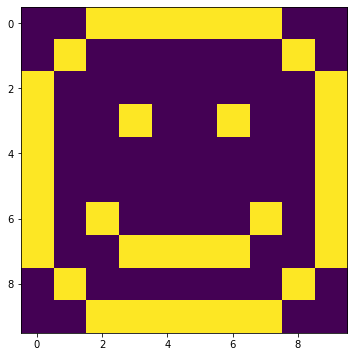

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#  Двумерный массив пикселей:
smile = [[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
         [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
         [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]]

fig, ax = plt.subplots()

ax.imshow(smile)

fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Как видите в этом действительно нет ничего сложного - количество строк и столбцов в массиве это высота и ширина изображения, а каждое число в массиве соответствует определенному цвету из встроенной палитры. Как правило, числа, должны находиться в интервале [0, 1]. Если вы указываете целые числа, то все они будут автоматически нормализованы и приведены к данному интервалу, в чем очень легко убедиться:

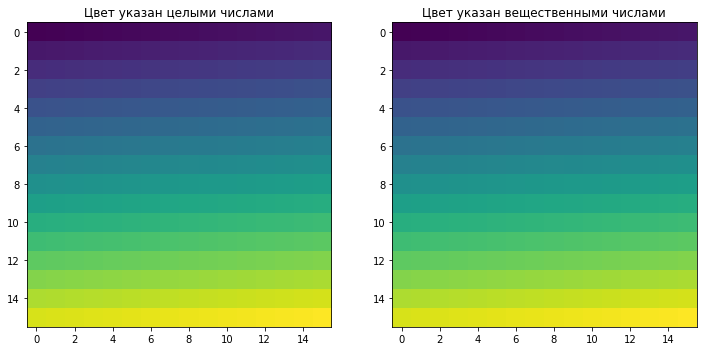

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data_int = np.arange(0, 256).reshape(16, 16)
data_float = np.linspace(0, 1, 256).reshape(16, 16)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(data_int)
axes[0].set_title('Цвет указан целыми числами')

axes[1].imshow(data_float)
axes[1].set_title('Цвет указан вещественными числами')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

Нередко, бывает очень полезным отобразить в виде изображения график некоторой трехмерной функции z = f(x, y), на котором каждому значению z соответствует определенный цвет:

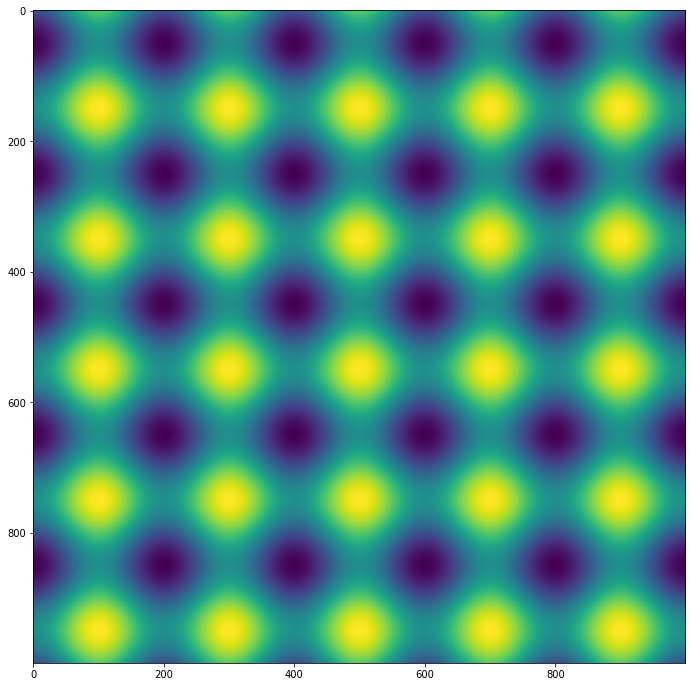

In [5]:
import numpy as np
import matplotlib.pyplot as plt


x, y = np.mgrid[-5*np.pi:5*np.pi:1000j,
                -5*np.pi:5*np.pi:1000j]

z = np.sin(x) + np.cos(y)

fig, ax = plt.subplots()

ax.imshow(z)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

### Файлы изображений

Как отображать сгенерированные данные мы разобрались, теперь давайте разберемся с тем как загружать файлы изображений.

Самый простой способ, загрузить файл изображения и отобразить его - воспользоваться функцией get_sample_data() из модуля cbook. Данная функция, в зависимости от того, в какой директории выполняется скрипт принимает либо имя файла (скрипт выполняется в той же папке что и файл) либо просто путь к файлу. После того, как мы создали объект файла его необходимо прочитать в массив NumPy с помощью функции imread модуля pyplot. Давайте проверим в действии:

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#  cbook - модуль "всяких полезностей":
import matplotlib.cbook as cbook

#  Конструкция "with ... as" гарантирует, что файл
#  будет закрыт после прочтения:
with cbook.get_sample_data('pic/gvido.jpeg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()

ax.imshow(image)
ax.set_title(type(image))

fig.set_figwidth(7)    #  ширина и
fig.set_figheight(7)    #  высота "Figure"

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/dmf/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/sample_data/pic/gvido.jpeg'

Щбратите внимание на заголовок графика, который мы отобразили командой ax.set_title(type(image)). 

Строка <class 'numpy.ndarray'> - означает, что объект image - это массив NumPy, т.е. теперь мы можем манипулировать этим массивом как нам угодно. Но для начала давайте узнаем размеры массива:

In [12]:
image.shape

NameError: name 'image' is not defined

Из-за того что для обозначения цвета пикселя используется модель RGB наш массив не двумерный, а трехмерный: высота - 399 пикселей, ширина - 266 пикселей, и три числа для уровней красного, зеленого и голубого. В модели RGBA каждый пиксель будет задан четырьмя числами, где четвертое число - уровень прозрачности. Если каждый цвет пикселя задан в оттенках серого, то массив будет двумерным, так как для уровня серого достаточно одного числа.

Разобравшись с цветовой моделью картинки можем приступить к ее изменению:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

with cbook.get_sample_data('/home/n1/guido.jpg') as image_file:
    image = plt.imread(image_file)

fig, axes = plt.subplots(1, 3)

#  Данные в image доступны только для чтения
image_1 = image.copy()
image_2 = image.copy()
image_3 = image.copy()

image_1[:, :, 0] = 0
axes[0].imshow(image_1)
axes[0].set_title('Red = 0')

image_2[:, :, 1] = 0
axes[1].imshow(image_2)
axes[1].set_title('Green = 0')

image_3[:, :, 2] = 0
axes[2].imshow(image_3)
axes[2].set_title('Blue = 0')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/n1/guido.jpg'